# Falsetto Classifier

A basic atempt to classify a song's falsetto level

## Drive connection and imports

In [37]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
import pandas as pd
import matplotlib.pyplot as plt

import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN

from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

### Auxiliary functions

In [39]:
def show_confusion_matrix(y_test, y_pred):
  cm = confusion_matrix(y_test, y_pred)
  fig = plt.figure()
  ax = fig.add_subplot(111)
  cax = ax.matshow(cm)
  plt.title('Confusion matrix of the classifier')
  fig.colorbar(cax)
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.show()

In [82]:
def get_y_and_X(df):
  y = df['falsetto']

  cols = [col for col in df.columns if col is not 'falsetto' and col is not 'spotify_id']
  X = df.drop(axis=1, columns=['falsetto', 'spotify_id'])
  return y, X

def show_metrics(y_test, y_pred):
  print('Accuracy score: {}'.format(accuracy_score(y_test, y_pred)))
  print('F1 Macro-Score: {}'.format(f1_score(y_test, y_pred, average='macro')))
  print('F1 Weighted-Score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

## Dataframe operations

In [41]:
df = pd.read_csv('/content/drive/MyDrive/ML.csv') #a mix of dataframe.csv + main.csv
df

,gender,falsetto,spotify_id,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,lowlevel.average_loudness,lowlevel.barkbands_crest.mean,lowlevel.barkbands_crest.stdev,lowlevel.barkbands_flatness_db.mean,lowlevel.barkbands_flatness_db.stdev,lowlevel.barkbands_kurtosis.mean,lowlevel.barkbands_kurtosis.stdev,lowlevel.barkbands_skewness.mean,lowlevel.barkbands_skewness.stdev,lowlevel.barkbands_spread.mean,lowlevel.barkbands_spread.stdev,lowlevel.dissonance.mean,lowlevel.dissonance.stdev,lowlevel.dynamic_complexity,lowlevel.erbbands_crest.mean,lowlevel.erbbands_crest.stdev,lowlevel.erbbands_flatness_db.mean,lowlevel.erbbands_flatness_db.stdev,lowlevel.erbbands_kurtosis.mean,lowlevel.erbbands_kurtosis.stdev,lowlevel.erbbands_skewness.mean,lowlevel.erbbands_skewness.stdev,lowlevel.erbbands_spread.mean,lowlevel.erbbands_spread.stdev,lowlevel.hfc.mean,...,lowlevel.silence_rate_20dB.mean,lowlevel.silence_rate_20dB.stdev,lowlevel.silence_rate_30dB.mean,lowlevel.silence_rate_30dB.stdev,lowlevel.silence_rate_60dB.mean,lowlevel.silence_rate_60dB.stdev,lowlevel.spectral_centroid.mean,lowlevel.spectral_centroid.stdev,lowlevel.spectral_complexity.mean,lowlevel.spectral_complexity.stdev,lowlevel.spectral_decrease.mean,lowlevel.spectral_decrease.stdev,lowlevel.spectral_energy.mean,lowlevel.spectral_energy.stdev,lowlevel.spectral_energyband_high.mean,lowlevel.spectral_energyband_high.stdev,lowlevel.spectral_energyband_low.mean,lowlevel.spectral_energyband_low.stdev,lowlevel.spectral_energyband_middle_high.mean,lowlevel.spectral_energyband_middle_high.stdev,lowlevel.spectral_energyband_middle_low.mean,lowlevel.spectral_energyband_middle_low.stdev,lowlevel.spectral_entropy.mean,lowlevel.spectral_entropy.stdev,lowlevel.spectral_flux.mean,lowlevel.spectral_flux.stdev,lowlevel.spectral_kurtosis.mean,lowlevel.spectral_kurtosis.stdev,lowlevel.spectral_rms.mean,lowlevel.spectral_rms.stdev,lowlevel.spectral_rolloff.mean,lowlevel.spectral_rolloff.stdev,lowlevel.spectral_skewness.mean,lowlevel.spectral_skewness.stdev,lowlevel.spectral_spread.mean,lowlevel.spectral_spread.stdev,lowlevel.spectral_strongpeak.mean,lowlevel.spectral_strongpeak.stdev,lowlevel.zerocrossingrate.mean,lowlevel.zerocrossingrate.stdev
0,male,0.0,5g5EdgkfKVUceOTJtm0Kel,0.5730,0.487,0.192,0.000003,1.0,0.0759,-17.308,1.0,0.0291,62.086,4.0,0.260,0.314780,16.475048,6.108535,0.388782,0.128925,171.582352,1985.681274,4.088415,10.431328,10.310682,14.496572,0.362860,0.105160,14.659706,17.132730,6.701280,0.337979,0.101121,23.133259,55.214577,1.973166,3.372981,22.599724,25.468536,10.889482,...,1.000000,0.000000,0.993673,0.079290,0.384083,0.486363,1179.379517,1513.351807,3.808107,3.954129,-3.921024e-09,5.349170e-09,0.015787,0.021532,0.000218,0.000814,4.760192e-04,0.003707,0.004490,0.011949,0.011114,0.016970,6.008079,1.232959,0.044188,0.047064,17.344090,38.644321,0.002975,0.002559,1971.881714,2904.578125,2.766868,2.309679,4682942.50,2566181.25,1.312214,1.776766,0.073260,0.091557
1,male,0.0,62GYoGszQfROZswLee6W3O,0.3140,0.850,0.466,0.023400,1.0,0.1290,-15.673,1.0,0.0555,109.936,4.0,0.860,0.341378,13.247320,5.402847,0.318010,0.089471,22.434696,250.026764,1.428453,3.636823,15.151459,13.803043,0.426596,0.072214,10.313574,14.804422,6.214413,0.328013,0.080004,6.497407,18.687489,0.782621,1.904286,25.167845,22.521036,12.435798,...,1.000000,0.000000,0.998137,0.043121,0.511370,0.499865,1647.898682,1162.853149,5.997672,5.865674,-2.487682e-09,4.175873e-09,0.010517,0.017508,0.000270,0.000782,2.415479e-05,0.000252,0.005516,0.012318,0.004872,0.010394,6.917550,0.858876,0.046576,0.044677,10.219045,28.529499,0.002335,0.002193,2611.819824,2596.150146,1.852206,1.690892,4348480.50,2316541.00,1.372175,1.901234,0.093488,0.074530
2,male,0.0,2nWHzbBWBOePUvAImQv2So,0.0317,0.878,0.951,0.544000,7.0,0.0614,-5.077,1.0,0.0690,111.334,4.0,0.607,0.000380,13.912879,7.189879,0.334680,0.232915,3707.491699,131284.078125,-3.337926,52.784584,15.820780,17.498075,0.459818,0.

In [42]:
df.dropna(subset=['lowlevel.hfc.stdev'],  inplace=True)
df

,gender,falsetto,spotify_id,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,lowlevel.average_loudness,lowlevel.barkbands_crest.mean,lowlevel.barkbands_crest.stdev,lowlevel.barkbands_flatness_db.mean,lowlevel.barkbands_flatness_db.stdev,lowlevel.barkbands_kurtosis.mean,lowlevel.barkbands_kurtosis.stdev,lowlevel.barkbands_skewness.mean,lowlevel.barkbands_skewness.stdev,lowlevel.barkbands_spread.mean,lowlevel.barkbands_spread.stdev,lowlevel.dissonance.mean,lowlevel.dissonance.stdev,lowlevel.dynamic_complexity,lowlevel.erbbands_crest.mean,lowlevel.erbbands_crest.stdev,lowlevel.erbbands_flatness_db.mean,lowlevel.erbbands_flatness_db.stdev,lowlevel.erbbands_kurtosis.mean,lowlevel.erbbands_kurtosis.stdev,lowlevel.erbbands_skewness.mean,lowlevel.erbbands_skewness.stdev,lowlevel.erbbands_spread.mean,lowlevel.erbbands_spread.stdev,lowlevel.hfc.mean,...,lowlevel.silence_rate_20dB.mean,lowlevel.silence_rate_20dB.stdev,lowlevel.silence_rate_30dB.mean,lowlevel.silence_rate_30dB.stdev,lowlevel.silence_rate_60dB.mean,lowlevel.silence_rate_60dB.stdev,lowlevel.spectral_centroid.mean,lowlevel.spectral_centroid.stdev,lowlevel.spectral_complexity.mean,lowlevel.spectral_complexity.stdev,lowlevel.spectral_decrease.mean,lowlevel.spectral_decrease.stdev,lowlevel.spectral_energy.mean,lowlevel.spectral_energy.stdev,lowlevel.spectral_energyband_high.mean,lowlevel.spectral_energyband_high.stdev,lowlevel.spectral_energyband_low.mean,lowlevel.spectral_energyband_low.stdev,lowlevel.spectral_energyband_middle_high.mean,lowlevel.spectral_energyband_middle_high.stdev,lowlevel.spectral_energyband_middle_low.mean,lowlevel.spectral_energyband_middle_low.stdev,lowlevel.spectral_entropy.mean,lowlevel.spectral_entropy.stdev,lowlevel.spectral_flux.mean,lowlevel.spectral_flux.stdev,lowlevel.spectral_kurtosis.mean,lowlevel.spectral_kurtosis.stdev,lowlevel.spectral_rms.mean,lowlevel.spectral_rms.stdev,lowlevel.spectral_rolloff.mean,lowlevel.spectral_rolloff.stdev,lowlevel.spectral_skewness.mean,lowlevel.spectral_skewness.stdev,lowlevel.spectral_spread.mean,lowlevel.spectral_spread.stdev,lowlevel.spectral_strongpeak.mean,lowlevel.spectral_strongpeak.stdev,lowlevel.zerocrossingrate.mean,lowlevel.zerocrossingrate.stdev
0,male,0.0,5g5EdgkfKVUceOTJtm0Kel,0.5730,0.487,0.192,0.000003,1.0,0.0759,-17.308,1.0,0.0291,62.086,4.0,0.260,0.314780,16.475048,6.108535,0.388782,0.128925,171.582352,1985.681274,4.088415,10.431328,10.310682,14.496572,0.362860,0.105160,14.659706,17.132730,6.701280,0.337979,0.101121,23.133259,55.214577,1.973166,3.372981,22.599724,25.468536,10.889482,...,1.000000,0.000000,0.993673,0.079290,0.384083,0.486363,1179.379517,1513.351807,3.808107,3.954129,-3.921024e-09,5.349170e-09,0.015787,0.021532,0.000218,0.000814,4.760192e-04,0.003707,0.004490,0.011949,0.011114,0.016970,6.008079,1.232959,0.044188,0.047064,17.344090,38.644321,0.002975,0.002559,1971.881714,2904.578125,2.766868,2.309679,4682942.50,2566181.250,1.312214,1.776766,0.073260,0.091557
1,male,0.0,62GYoGszQfROZswLee6W3O,0.3140,0.850,0.466,0.023400,1.0,0.1290,-15.673,1.0,0.0555,109.936,4.0,0.860,0.341378,13.247320,5.402847,0.318010,0.089471,22.434696,250.026764,1.428453,3.636823,15.151459,13.803043,0.426596,0.072214,10.313574,14.804422,6.214413,0.328013,0.080004,6.497407,18.687489,0.782621,1.904286,25.167845,22.521036,12.435798,...,1.000000,0.000000,0.998137,0.043121,0.511370,0.499865,1647.898682,1162.853149,5.997672,5.865674,-2.487682e-09,4.175873e-09,0.010517,0.017508,0.000270,0.000782,2.415479e-05,0.000252,0.005516,0.012318,0.004872,0.010394,6.917550,0.858876,0.046576,0.044677,10.219045,28.529499,0.002335,0.002193,2611.819824,2596.150146,1.852206,1.690892,4348480.50,2316541.000,1.372175,1.901234,0.093488,0.074530
2,male,0.0,2nWHzbBWBOePUvAImQv2So,0.0317,0.878,0.951,0.544000,7.0,0.0614,-5.077,1.0,0.0690,111.334,4.0,0.607,0.000380,13.912879,7.189879,0.334680,0.232915,3707.491699,131284.078125,-3.337926,52.784584,15.820780,17.498075,0.459818,

### See distributions

In [43]:
df['falsetto'].value_counts()

0.0     13241
2.0      1295
3.0       725
4.0       614
5.0       220
6.0       156
7.0        80
8.0        75
10.0       57
9.0        26
Name: falsetto, dtype: int64

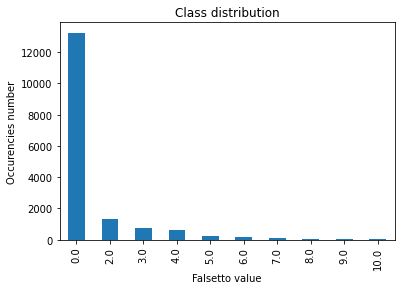

In [44]:
values = df['falsetto'].value_counts().sort_index()
values.plot.bar(**{'title': 'Class distribution', 'xlabel': 'Falsetto value', 'ylabel':'Occurencies number'})

## Classifiers using the entire dataset

### SMOTE oversampling

#### Decision Tree

In [84]:
y,X = get_y_and_X(df)
enc = OneHotEncoder()
enc_X = enc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(enc_X, y, test_size=0.33, random_state=13)

oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [85]:
dt_clf = DecisionTreeClassifier(random_state=0)
dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)

In [86]:
show_metrics(y_test, y_pred)

Accuracy score: 0.7541345093715546
F1 Macro-Score: 0.09817477985253972
F1 Weighted-Score: 0.6988651302332303


In [87]:
matrix = confusion_matrix(y_test, y_pred)
matrix.diagonal()/matrix.sum(axis=1)

array([0.9362239 , 0.02325581, 0.03292181, 0.02427184, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

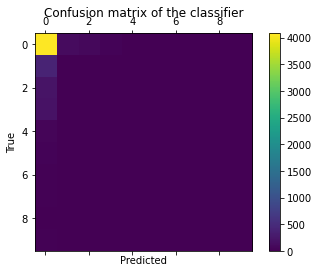

In [88]:
show_confusion_matrix(y_test, y_pred)

#### Using Random Forest

In [89]:
rf_clf = RandomForestClassifier(random_state=13)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)

In [90]:
show_metrics(y_test, y_pred)

Accuracy score: 0.8009922822491731
F1 Macro-Score: 0.08895010713192532
F1 Weighted-Score: 0.7124834931790931


In [91]:
matrix = confusion_matrix(y_test, y_pred)
matrix.diagonal()/matrix.sum(axis=1)

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

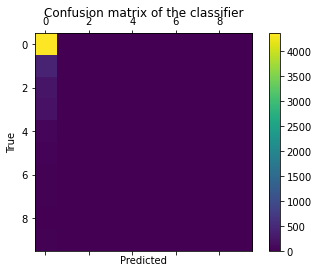

In [92]:
show_confusion_matrix(y_test, y_pred)

### SMOTEENN resampling 

In [93]:
y,X = get_y_and_X(df)
enc = OneHotEncoder()
enc_X = enc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(enc_X, y, test_size=0.33, random_state=13)

In [94]:
resample = SMOTEENN()
X_train, y_train = resample.fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


#### Decision Tree

In [95]:
#Decision Tree
dt_clf2 = DecisionTreeClassifier(random_state=1)
dt_clf2.fit(X_train, y_train)
y_pred = dt_clf2.predict(X_test)

In [96]:
show_metrics(y_test, y_pred)

Accuracy score: 0.06780595369349504
F1 Macro-Score: 0.032343001091052925
F1 Weighted-Score: 0.017990549756774134


In [97]:
matrix = confusion_matrix(y_test, y_pred)
matrix.diagonal()/matrix.sum(axis=1)

array([0.        , 0.66976744, 0.16049383, 0.19902913, 0.        ,
       0.02083333, 0.        , 0.        , 0.        , 0.        ])

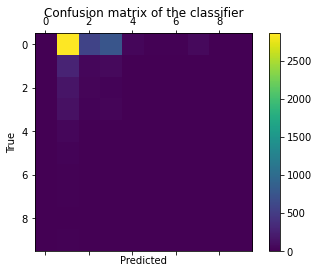

In [98]:
show_confusion_matrix(y_test, y_pred)

#### Random Forest

In [99]:
#Random Forest

rf_clf2 = RandomForestClassifier(random_state=1)
rf_clf2.fit(X_train, y_train)
y_pred = rf_clf2.predict(X_test)

In [100]:
show_metrics(y_test, y_pred)

Accuracy score: 0.07901506798970967
F1 Macro-Score: 0.014645776566757493
F1 Weighted-Score: 0.0115723703118444


In [101]:
matrix = confusion_matrix(y_test, y_pred)
matrix.diagonal()/matrix.sum(axis=1)

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

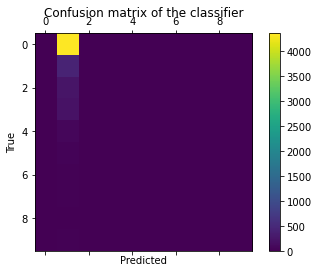

In [102]:
show_confusion_matrix(y_test, y_pred)

### SMOTE `auto`

In [103]:
y,X = get_y_and_X(df)
enc = OneHotEncoder()
enc_X = enc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(enc_X, y, test_size=0.33, random_state=11)

In [104]:
oversample = SMOTE(sampling_strategy='auto', k_neighbors=8, random_state=2)
X_train, y_train = oversample.fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


#### Decision Tree

In [105]:
#Decision Tree
dt_clf3 = DecisionTreeClassifier(random_state=6)
dt_clf3.fit(X_train, y_train)
y_pred = dt_clf3.predict(X_test)

In [106]:
show_metrics(y_test, y_pred)

Accuracy score: 0.7499081220139655
F1 Macro-Score: 0.09920582481982759
F1 Weighted-Score: 0.6992587916758487


In [107]:
matrix = confusion_matrix(y_test, y_pred)
matrix.diagonal()/matrix.sum(axis=1)

array([0.92808062, 0.04567308, 0.01646091, 0.02739726, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

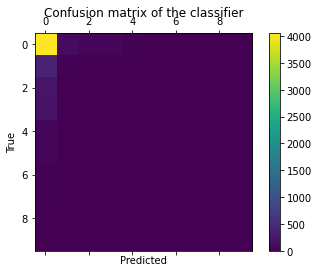

In [108]:
show_confusion_matrix(y_test, y_pred)

#### Random Forest

In [109]:
#Random Forest
rf_clf3 = RandomForestClassifier(random_state=6)
rf_clf3.fit(X_train, y_train)
y_pred = rf_clf3.predict(X_test)

In [110]:
show_metrics(y_test, y_pred)

Accuracy score: 0.8022785740536568
F1 Macro-Score: 0.08902936378466557
F1 Weighted-Score: 0.7142635102606576


In [111]:
matrix = confusion_matrix(y_test, y_pred)
matrix.diagonal()/matrix.sum(axis=1)

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

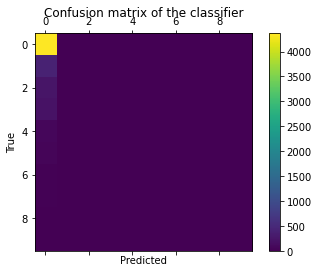

In [112]:
show_confusion_matrix(y_test, y_pred)

#### Balanced Decision Tree 

In [113]:
#DTree Balanced
dt_clf4 = DecisionTreeClassifier(random_state=6, class_weight="balanced")
dt_clf4.fit(X_train, y_train)
y_pred = dt_clf4.predict(X_test)

In [114]:
show_metrics(y_test, y_pred)

Accuracy score: 0.7499081220139655
F1 Macro-Score: 0.09920582481982759
F1 Weighted-Score: 0.6992587916758487


In [115]:
matrix = confusion_matrix(y_test, y_pred)
matrix.diagonal()/matrix.sum(axis=1)

array([0.92808062, 0.04567308, 0.01646091, 0.02739726, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

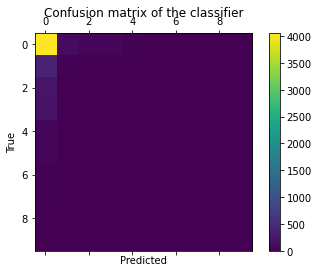

In [116]:
show_confusion_matrix(y_test, y_pred)

#### Balanced Entropy Decision Tree

In [117]:
#DTree Balanced Entropy
dt_clf5 = DecisionTreeClassifier(random_state=8, class_weight="balanced", criterion="entropy")
dt_clf5.fit(X_train, y_train)
y_pred = dt_clf5.predict(X_test)

In [118]:
show_metrics(y_test, y_pred)

Accuracy score: 0.7684674751929438
F1 Macro-Score: 0.09429292266582912
F1 Weighted-Score: 0.7042347872267737


In [119]:
matrix = confusion_matrix(y_test, y_pred)
matrix.diagonal()/matrix.sum(axis=1)

array([0.95442052, 0.02644231, 0.00411523, 0.01369863, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

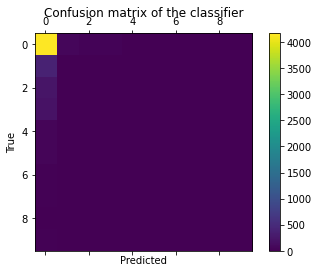

In [120]:
show_confusion_matrix(y_test, y_pred)

## Manually reduce number of `falsetto == 0`

In [45]:
#Get falsetto == 0

index_names = df[df['falsetto'] == 0].index
index_names

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
               10,
            ...
            19887, 19888, 19889, 19891, 19892, 19894, 19895, 19897, 19898,
            19899],
           dtype='int64', length=13241)

In [46]:
max_index = 0.9*len(index_names)
index_drop = index_names[:int(max_index)]
df_new = df.drop(index_drop)
df_new

,gender,falsetto,spotify_id,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,lowlevel.average_loudness,lowlevel.barkbands_crest.mean,lowlevel.barkbands_crest.stdev,lowlevel.barkbands_flatness_db.mean,lowlevel.barkbands_flatness_db.stdev,lowlevel.barkbands_kurtosis.mean,lowlevel.barkbands_kurtosis.stdev,lowlevel.barkbands_skewness.mean,lowlevel.barkbands_skewness.stdev,lowlevel.barkbands_spread.mean,lowlevel.barkbands_spread.stdev,lowlevel.dissonance.mean,lowlevel.dissonance.stdev,lowlevel.dynamic_complexity,lowlevel.erbbands_crest.mean,lowlevel.erbbands_crest.stdev,lowlevel.erbbands_flatness_db.mean,lowlevel.erbbands_flatness_db.stdev,lowlevel.erbbands_kurtosis.mean,lowlevel.erbbands_kurtosis.stdev,lowlevel.erbbands_skewness.mean,lowlevel.erbbands_skewness.stdev,lowlevel.erbbands_spread.mean,lowlevel.erbbands_spread.stdev,lowlevel.hfc.mean,...,lowlevel.silence_rate_20dB.mean,lowlevel.silence_rate_20dB.stdev,lowlevel.silence_rate_30dB.mean,lowlevel.silence_rate_30dB.stdev,lowlevel.silence_rate_60dB.mean,lowlevel.silence_rate_60dB.stdev,lowlevel.spectral_centroid.mean,lowlevel.spectral_centroid.stdev,lowlevel.spectral_complexity.mean,lowlevel.spectral_complexity.stdev,lowlevel.spectral_decrease.mean,lowlevel.spectral_decrease.stdev,lowlevel.spectral_energy.mean,lowlevel.spectral_energy.stdev,lowlevel.spectral_energyband_high.mean,lowlevel.spectral_energyband_high.stdev,lowlevel.spectral_energyband_low.mean,lowlevel.spectral_energyband_low.stdev,lowlevel.spectral_energyband_middle_high.mean,lowlevel.spectral_energyband_middle_high.stdev,lowlevel.spectral_energyband_middle_low.mean,lowlevel.spectral_energyband_middle_low.stdev,lowlevel.spectral_entropy.mean,lowlevel.spectral_entropy.stdev,lowlevel.spectral_flux.mean,lowlevel.spectral_flux.stdev,lowlevel.spectral_kurtosis.mean,lowlevel.spectral_kurtosis.stdev,lowlevel.spectral_rms.mean,lowlevel.spectral_rms.stdev,lowlevel.spectral_rolloff.mean,lowlevel.spectral_rolloff.stdev,lowlevel.spectral_skewness.mean,lowlevel.spectral_skewness.stdev,lowlevel.spectral_spread.mean,lowlevel.spectral_spread.stdev,lowlevel.spectral_strongpeak.mean,lowlevel.spectral_strongpeak.stdev,lowlevel.zerocrossingrate.mean,lowlevel.zerocrossingrate.stdev
9,male,2.0,4xbJyF9RDa1VLoZNoCFy1r,0.4930,0.500,0.489,0.000130,2.0,0.1630,-11.428,1.0,0.0299,84.284,4.0,0.441,0.087164,16.133881,6.199416,0.451651,0.190648,1018.535583,12594.224609,-1.894238,23.194410,14.183435,15.104695,0.442571,0.078251,17.712357,17.840931,7.623227,0.436200,0.183148,14.890928,42.831913,-0.007687,2.863652,27.717232,28.176682,15.359092,...,1.0,0.0,0.998998,0.031638,0.558016,0.496613,3290.795898,2296.282471,5.061824,6.995011,-2.422278e-09,4.023164e-09,0.010535,0.017043,0.001315,0.003356,1.224002e-05,1.434413e-04,0.002980,0.008061,0.006427,0.012803,6.501919,1.095514,0.040154,0.044701,9.649785,30.967543,0.002175,0.002355,4735.147949,3267.810791,1.116404,1.886502,4561006.00,2603007.000,1.443960,1.749026,0.178995,0.119499
15,female,4.0,6i9b14YXyWIMiQg26IWYA5,0.0370,0.604,0.549,0.000000,5.0,0.0856,-13.252,1.0,0.0550,105.490,4.0,0.704,0.491534,14.070756,5.264986,0.369924,0.099384,51.808689,845.144165,0.498201,5.645842,10.776309,10.765557,0.413124,0.075198,11.795732,16.108191,6.156250,0.380485,0.094145,8.348461,26.479969,0.492133,2.062807,17.768320,16.427601,19.481955,...,1.0,0.0,0.998432,0.039571,0.350584,0.477162,1841.798340,1699.701050,7.336470,6.358587,-3.751493e-09,4.181106e-09,0.015926,0.017649,0.000433,0.000877,5.596400e-08,1.477190e-06,0.010498,0.015524,0.005351,0.007497,6.528044,0.813488,0.061631,0.051552,12.246874,28.581156,0.003151,0.002368,2836.416016,3128.354980,2.057861,1.807891,3878335.25,2358086.750,2.286654,2.462046,0.102232,0.103619
23,male,2.0,59HxRYpU61UgzewVxove4P,0.0300,0.721,0.507,0.000007,9.0,0.0939,-14.160,1.0,0.0304,124.355,4.0,0.937,0.020444,15.192824,5.395232,0.360409,0.125727,64.883072,680.759827,-1.625294,5.272084,8.995755,11.310210,0.460597,0.062058,33

### See new distribution

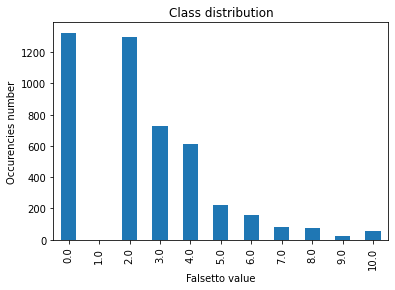

In [47]:
new_values = df_new['falsetto'].value_counts()
new_values = new_values.append(pd.Series({1.0:0}))
new_values = new_values.sort_index()
new_values.plot.bar(**{'title': 'Class distribution', 'xlabel': 'Falsetto value', 'ylabel':'Occurencies number'})

### Classifier using this setting

In [48]:
#1
y, X = get_y_and_X(df_new)
enc = OneHotEncoder()
enc_X = enc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(enc_X, y, test_size=0.33, random_state=42)

In [49]:
dt_clf2 = DecisionTreeClassifier(random_state=12, class_weight="balanced", criterion="entropy", max_depth=54)
dt_clf2.fit(X_train, y_train)
y_pred = dt_clf2.predict(X_test)

In [50]:
show_metrics(y_test, y_pred)

Accuracy score: 0.21986754966887417
F1 Macro-Score: 0.09085288429307684
F1 Weighted-Score: 0.20871377326114257


In [51]:
matrix = confusion_matrix(y_test, y_pred)
matrix.diagonal()/matrix.sum(axis=1)

array([0.29186603, 0.39066339, 0.09960159, 0.05660377, 0.17721519,
       0.        , 0.        , 0.        , 0.        , 0.        ])

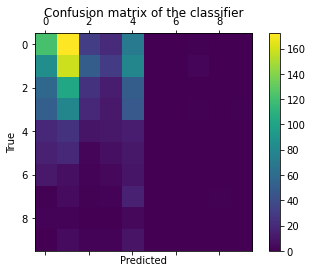

In [52]:
show_confusion_matrix(y_test, y_pred)

## Binary Classifier

In [55]:
df_bin = df.copy()
df_bin['falsetto'] = df_bin['falsetto'].apply(lambda x: 0 if x == 0 else 1)
df_bin

,gender,falsetto,spotify_id,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,lowlevel.average_loudness,lowlevel.barkbands_crest.mean,lowlevel.barkbands_crest.stdev,lowlevel.barkbands_flatness_db.mean,lowlevel.barkbands_flatness_db.stdev,lowlevel.barkbands_kurtosis.mean,lowlevel.barkbands_kurtosis.stdev,lowlevel.barkbands_skewness.mean,lowlevel.barkbands_skewness.stdev,lowlevel.barkbands_spread.mean,lowlevel.barkbands_spread.stdev,lowlevel.dissonance.mean,lowlevel.dissonance.stdev,lowlevel.dynamic_complexity,lowlevel.erbbands_crest.mean,lowlevel.erbbands_crest.stdev,lowlevel.erbbands_flatness_db.mean,lowlevel.erbbands_flatness_db.stdev,lowlevel.erbbands_kurtosis.mean,lowlevel.erbbands_kurtosis.stdev,lowlevel.erbbands_skewness.mean,lowlevel.erbbands_skewness.stdev,lowlevel.erbbands_spread.mean,lowlevel.erbbands_spread.stdev,lowlevel.hfc.mean,...,lowlevel.silence_rate_20dB.mean,lowlevel.silence_rate_20dB.stdev,lowlevel.silence_rate_30dB.mean,lowlevel.silence_rate_30dB.stdev,lowlevel.silence_rate_60dB.mean,lowlevel.silence_rate_60dB.stdev,lowlevel.spectral_centroid.mean,lowlevel.spectral_centroid.stdev,lowlevel.spectral_complexity.mean,lowlevel.spectral_complexity.stdev,lowlevel.spectral_decrease.mean,lowlevel.spectral_decrease.stdev,lowlevel.spectral_energy.mean,lowlevel.spectral_energy.stdev,lowlevel.spectral_energyband_high.mean,lowlevel.spectral_energyband_high.stdev,lowlevel.spectral_energyband_low.mean,lowlevel.spectral_energyband_low.stdev,lowlevel.spectral_energyband_middle_high.mean,lowlevel.spectral_energyband_middle_high.stdev,lowlevel.spectral_energyband_middle_low.mean,lowlevel.spectral_energyband_middle_low.stdev,lowlevel.spectral_entropy.mean,lowlevel.spectral_entropy.stdev,lowlevel.spectral_flux.mean,lowlevel.spectral_flux.stdev,lowlevel.spectral_kurtosis.mean,lowlevel.spectral_kurtosis.stdev,lowlevel.spectral_rms.mean,lowlevel.spectral_rms.stdev,lowlevel.spectral_rolloff.mean,lowlevel.spectral_rolloff.stdev,lowlevel.spectral_skewness.mean,lowlevel.spectral_skewness.stdev,lowlevel.spectral_spread.mean,lowlevel.spectral_spread.stdev,lowlevel.spectral_strongpeak.mean,lowlevel.spectral_strongpeak.stdev,lowlevel.zerocrossingrate.mean,lowlevel.zerocrossingrate.stdev
0,male,0,5g5EdgkfKVUceOTJtm0Kel,0.5730,0.487,0.192,0.000003,1.0,0.0759,-17.308,1.0,0.0291,62.086,4.0,0.260,0.314780,16.475048,6.108535,0.388782,0.128925,171.582352,1985.681274,4.088415,10.431328,10.310682,14.496572,0.362860,0.105160,14.659706,17.132730,6.701280,0.337979,0.101121,23.133259,55.214577,1.973166,3.372981,22.599724,25.468536,10.889482,...,1.000000,0.000000,0.993673,0.079290,0.384083,0.486363,1179.379517,1513.351807,3.808107,3.954129,-3.921024e-09,5.349170e-09,0.015787,0.021532,0.000218,0.000814,4.760192e-04,0.003707,0.004490,0.011949,0.011114,0.016970,6.008079,1.232959,0.044188,0.047064,17.344090,38.644321,0.002975,0.002559,1971.881714,2904.578125,2.766868,2.309679,4682942.50,2566181.250,1.312214,1.776766,0.073260,0.091557
1,male,0,62GYoGszQfROZswLee6W3O,0.3140,0.850,0.466,0.023400,1.0,0.1290,-15.673,1.0,0.0555,109.936,4.0,0.860,0.341378,13.247320,5.402847,0.318010,0.089471,22.434696,250.026764,1.428453,3.636823,15.151459,13.803043,0.426596,0.072214,10.313574,14.804422,6.214413,0.328013,0.080004,6.497407,18.687489,0.782621,1.904286,25.167845,22.521036,12.435798,...,1.000000,0.000000,0.998137,0.043121,0.511370,0.499865,1647.898682,1162.853149,5.997672,5.865674,-2.487682e-09,4.175873e-09,0.010517,0.017508,0.000270,0.000782,2.415479e-05,0.000252,0.005516,0.012318,0.004872,0.010394,6.917550,0.858876,0.046576,0.044677,10.219045,28.529499,0.002335,0.002193,2611.819824,2596.150146,1.852206,1.690892,4348480.50,2316541.000,1.372175,1.901234,0.093488,0.074530
2,male,0,2nWHzbBWBOePUvAImQv2So,0.0317,0.878,0.951,0.544000,7.0,0.0614,-5.077,1.0,0.0690,111.334,4.0,0.607,0.000380,13.912879,7.189879,0.334680,0.232915,3707.491699,131284.078125,-3.337926,52.784584,15.820780,17.498075,0.459818,0.0941

In [56]:
df_bin['falsetto'].value_counts()

0    13241
1     3248
Name: falsetto, dtype: int64

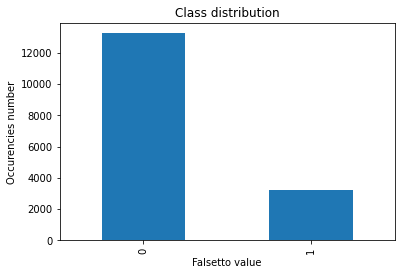

In [58]:
values = df_bin['falsetto'].value_counts().sort_index()
values.plot.bar(**{'title': 'Class distribution', 'xlabel': 'Falsetto value', 'ylabel':'Occurencies number'})

In [59]:
#Manually tuning
max_index = len(index_names)
index_drop = index_names[:len(index_names) - 3248]
df_bin = df_bin.drop(index_drop)
df_bin

,gender,falsetto,spotify_id,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,lowlevel.average_loudness,lowlevel.barkbands_crest.mean,lowlevel.barkbands_crest.stdev,lowlevel.barkbands_flatness_db.mean,lowlevel.barkbands_flatness_db.stdev,lowlevel.barkbands_kurtosis.mean,lowlevel.barkbands_kurtosis.stdev,lowlevel.barkbands_skewness.mean,lowlevel.barkbands_skewness.stdev,lowlevel.barkbands_spread.mean,lowlevel.barkbands_spread.stdev,lowlevel.dissonance.mean,lowlevel.dissonance.stdev,lowlevel.dynamic_complexity,lowlevel.erbbands_crest.mean,lowlevel.erbbands_crest.stdev,lowlevel.erbbands_flatness_db.mean,lowlevel.erbbands_flatness_db.stdev,lowlevel.erbbands_kurtosis.mean,lowlevel.erbbands_kurtosis.stdev,lowlevel.erbbands_skewness.mean,lowlevel.erbbands_skewness.stdev,lowlevel.erbbands_spread.mean,lowlevel.erbbands_spread.stdev,lowlevel.hfc.mean,...,lowlevel.silence_rate_20dB.mean,lowlevel.silence_rate_20dB.stdev,lowlevel.silence_rate_30dB.mean,lowlevel.silence_rate_30dB.stdev,lowlevel.silence_rate_60dB.mean,lowlevel.silence_rate_60dB.stdev,lowlevel.spectral_centroid.mean,lowlevel.spectral_centroid.stdev,lowlevel.spectral_complexity.mean,lowlevel.spectral_complexity.stdev,lowlevel.spectral_decrease.mean,lowlevel.spectral_decrease.stdev,lowlevel.spectral_energy.mean,lowlevel.spectral_energy.stdev,lowlevel.spectral_energyband_high.mean,lowlevel.spectral_energyband_high.stdev,lowlevel.spectral_energyband_low.mean,lowlevel.spectral_energyband_low.stdev,lowlevel.spectral_energyband_middle_high.mean,lowlevel.spectral_energyband_middle_high.stdev,lowlevel.spectral_energyband_middle_low.mean,lowlevel.spectral_energyband_middle_low.stdev,lowlevel.spectral_entropy.mean,lowlevel.spectral_entropy.stdev,lowlevel.spectral_flux.mean,lowlevel.spectral_flux.stdev,lowlevel.spectral_kurtosis.mean,lowlevel.spectral_kurtosis.stdev,lowlevel.spectral_rms.mean,lowlevel.spectral_rms.stdev,lowlevel.spectral_rolloff.mean,lowlevel.spectral_rolloff.stdev,lowlevel.spectral_skewness.mean,lowlevel.spectral_skewness.stdev,lowlevel.spectral_spread.mean,lowlevel.spectral_spread.stdev,lowlevel.spectral_strongpeak.mean,lowlevel.spectral_strongpeak.stdev,lowlevel.zerocrossingrate.mean,lowlevel.zerocrossingrate.stdev
9,male,1,4xbJyF9RDa1VLoZNoCFy1r,0.4930,0.500,0.489,0.000130,2.0,0.1630,-11.428,1.0,0.0299,84.284,4.0,0.441,0.087164,16.133881,6.199416,0.451651,0.190648,1018.535583,12594.224609,-1.894238,23.194410,14.183435,15.104695,0.442571,0.078251,17.712357,17.840931,7.623227,0.436200,0.183148,14.890928,42.831913,-0.007687,2.863652,27.717232,28.176682,15.359092,...,1.0,0.0,0.998998,0.031638,0.558016,0.496613,3290.795898,2296.282471,5.061824,6.995011,-2.422278e-09,4.023164e-09,0.010535,0.017043,0.001315,0.003356,1.224002e-05,1.434413e-04,0.002980,0.008061,0.006427,0.012803,6.501919,1.095514,0.040154,0.044701,9.649785,30.967543,0.002175,0.002355,4735.147949,3267.810791,1.116404,1.886502,4561006.00,2603007.000,1.443960,1.749026,0.178995,0.119499
15,female,1,6i9b14YXyWIMiQg26IWYA5,0.0370,0.604,0.549,0.000000,5.0,0.0856,-13.252,1.0,0.0550,105.490,4.0,0.704,0.491534,14.070756,5.264986,0.369924,0.099384,51.808689,845.144165,0.498201,5.645842,10.776309,10.765557,0.413124,0.075198,11.795732,16.108191,6.156250,0.380485,0.094145,8.348461,26.479969,0.492133,2.062807,17.768320,16.427601,19.481955,...,1.0,0.0,0.998432,0.039571,0.350584,0.477162,1841.798340,1699.701050,7.336470,6.358587,-3.751493e-09,4.181106e-09,0.015926,0.017649,0.000433,0.000877,5.596400e-08,1.477190e-06,0.010498,0.015524,0.005351,0.007497,6.528044,0.813488,0.061631,0.051552,12.246874,28.581156,0.003151,0.002368,2836.416016,3128.354980,2.057861,1.807891,3878335.25,2358086.750,2.286654,2.462046,0.102232,0.103619
23,male,1,59HxRYpU61UgzewVxove4P,0.0300,0.721,0.507,0.000007,9.0,0.0939,-14.160,1.0,0.0304,124.355,4.0,0.937,0.020444,15.192824,5.395232,0.360409,0.125727,64.883072,680.759827,-1.625294,5.272084,8.995755,11.310210,0.460597,0.062058,33.15309

In [60]:
df_bin['falsetto'].value_counts()

1    3248
0    3248
Name: falsetto, dtype: int64

### Binary Classifier

In [62]:
y, X = get_y_and_X(df_bin)
enc = OneHotEncoder()
enc_X = enc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(enc_X, y, test_size=0.33, random_state=42)

In [63]:
dt_clf_bin = DecisionTreeClassifier(random_state=12, max_depth=25)
dt_clf_bin.fit(X_train, y_train)
y_pred = dt_clf_bin.predict(X_test)

In [64]:
show_metrics(y_test, y_pred)

Accuracy score: 0.5331156716417911
F1 Macro-Score: 0.5329611345715054
F1 Weighted-Score: 0.5328501848800182


In [65]:
matrix = confusion_matrix(y_test, y_pred)
matrix.diagonal()/matrix.sum(axis=1)

array([0.55860113, 0.50828729])

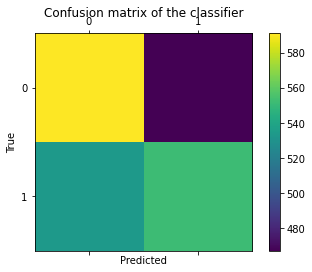

In [66]:
show_confusion_matrix(y_test, y_pred)

## Falsetto exists (`falsetto > 0`)

In [68]:
df_fals = df[df['falsetto'] >= 1]
df_fals

,gender,falsetto,spotify_id,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,lowlevel.average_loudness,lowlevel.barkbands_crest.mean,lowlevel.barkbands_crest.stdev,lowlevel.barkbands_flatness_db.mean,lowlevel.barkbands_flatness_db.stdev,lowlevel.barkbands_kurtosis.mean,lowlevel.barkbands_kurtosis.stdev,lowlevel.barkbands_skewness.mean,lowlevel.barkbands_skewness.stdev,lowlevel.barkbands_spread.mean,lowlevel.barkbands_spread.stdev,lowlevel.dissonance.mean,lowlevel.dissonance.stdev,lowlevel.dynamic_complexity,lowlevel.erbbands_crest.mean,lowlevel.erbbands_crest.stdev,lowlevel.erbbands_flatness_db.mean,lowlevel.erbbands_flatness_db.stdev,lowlevel.erbbands_kurtosis.mean,lowlevel.erbbands_kurtosis.stdev,lowlevel.erbbands_skewness.mean,lowlevel.erbbands_skewness.stdev,lowlevel.erbbands_spread.mean,lowlevel.erbbands_spread.stdev,lowlevel.hfc.mean,...,lowlevel.silence_rate_20dB.mean,lowlevel.silence_rate_20dB.stdev,lowlevel.silence_rate_30dB.mean,lowlevel.silence_rate_30dB.stdev,lowlevel.silence_rate_60dB.mean,lowlevel.silence_rate_60dB.stdev,lowlevel.spectral_centroid.mean,lowlevel.spectral_centroid.stdev,lowlevel.spectral_complexity.mean,lowlevel.spectral_complexity.stdev,lowlevel.spectral_decrease.mean,lowlevel.spectral_decrease.stdev,lowlevel.spectral_energy.mean,lowlevel.spectral_energy.stdev,lowlevel.spectral_energyband_high.mean,lowlevel.spectral_energyband_high.stdev,lowlevel.spectral_energyband_low.mean,lowlevel.spectral_energyband_low.stdev,lowlevel.spectral_energyband_middle_high.mean,lowlevel.spectral_energyband_middle_high.stdev,lowlevel.spectral_energyband_middle_low.mean,lowlevel.spectral_energyband_middle_low.stdev,lowlevel.spectral_entropy.mean,lowlevel.spectral_entropy.stdev,lowlevel.spectral_flux.mean,lowlevel.spectral_flux.stdev,lowlevel.spectral_kurtosis.mean,lowlevel.spectral_kurtosis.stdev,lowlevel.spectral_rms.mean,lowlevel.spectral_rms.stdev,lowlevel.spectral_rolloff.mean,lowlevel.spectral_rolloff.stdev,lowlevel.spectral_skewness.mean,lowlevel.spectral_skewness.stdev,lowlevel.spectral_spread.mean,lowlevel.spectral_spread.stdev,lowlevel.spectral_strongpeak.mean,lowlevel.spectral_strongpeak.stdev,lowlevel.zerocrossingrate.mean,lowlevel.zerocrossingrate.stdev
9,male,2.0,4xbJyF9RDa1VLoZNoCFy1r,0.4930,0.500,0.489,0.000130,2.0,0.1630,-11.428,1.0,0.0299,84.284,4.0,0.441,0.087164,16.133881,6.199416,0.451651,0.190648,1018.535583,12594.224609,-1.894238,23.194410,14.183435,15.104695,0.442571,0.078251,17.712357,17.840931,7.623227,0.436200,0.183148,14.890928,42.831913,-0.007687,2.863652,27.717232,28.176682,15.359092,...,1.0,0.0,0.998998,0.031638,0.558016,0.496613,3290.795898,2296.282471,5.061824,6.995011,-2.422278e-09,4.023164e-09,0.010535,0.017043,0.001315,0.003356,1.224002e-05,1.434413e-04,0.002980,0.008061,0.006427,0.012803,6.501919,1.095514,0.040154,0.044701,9.649785,30.967543,0.002175,0.002355,4735.147949,3267.810791,1.116404,1.886502,4561006.00,2603007.000,1.443960,1.749026,0.178995,0.119499
15,female,4.0,6i9b14YXyWIMiQg26IWYA5,0.0370,0.604,0.549,0.000000,5.0,0.0856,-13.252,1.0,0.0550,105.490,4.0,0.704,0.491534,14.070756,5.264986,0.369924,0.099384,51.808689,845.144165,0.498201,5.645842,10.776309,10.765557,0.413124,0.075198,11.795732,16.108191,6.156250,0.380485,0.094145,8.348461,26.479969,0.492133,2.062807,17.768320,16.427601,19.481955,...,1.0,0.0,0.998432,0.039571,0.350584,0.477162,1841.798340,1699.701050,7.336470,6.358587,-3.751493e-09,4.181106e-09,0.015926,0.017649,0.000433,0.000877,5.596400e-08,1.477190e-06,0.010498,0.015524,0.005351,0.007497,6.528044,0.813488,0.061631,0.051552,12.246874,28.581156,0.003151,0.002368,2836.416016,3128.354980,2.057861,1.807891,3878335.25,2358086.750,2.286654,2.462046,0.102232,0.103619
23,male,2.0,59HxRYpU61UgzewVxove4P,0.0300,0.721,0.507,0.000007,9.0,0.0939,-14.160,1.0,0.0304,124.355,4.0,0.937,0.020444,15.192824,5.395232,0.360409,0.125727,64.883072,680.759827,-1.625294,5.272084,8.995755,11.310210,0.460597,0.062058,33

In [69]:
df_fals['falsetto'].value_counts()

2.0     1295
3.0      725
4.0      614
5.0      220
6.0      156
7.0       80
8.0       75
10.0      57
9.0       26
Name: falsetto, dtype: int64

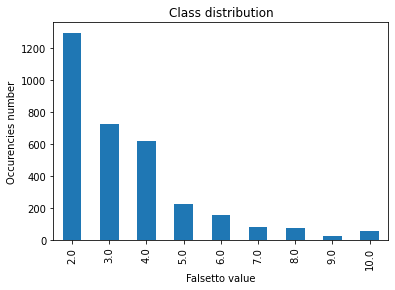

In [70]:
values = df_fals['falsetto'].value_counts().sort_index()
values.plot.bar(**{'title': 'Class distribution', 'xlabel': 'Falsetto value', 'ylabel':'Occurencies number'})

In [72]:
y,X = get_y_and_X(df_fals)
enc = OneHotEncoder()
enc_X = enc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(enc_X, y, test_size=0.33, random_state=42)

In [73]:
dt_clf_fals = DecisionTreeClassifier(random_state=12, class_weight="balanced", criterion="entropy")
dt_clf_fals.fit(X_train, y_train)
y_pred = dt_clf_fals.predict(X_test)

In [74]:
show_metrics(y_test, y_pred)

Accuracy score: 0.3516791044776119
F1 Macro-Score: 0.10399352267065273
F1 Weighted-Score: 0.2995871887758517


In [75]:
matrix = confusion_matrix(y_test, y_pred)
matrix.diagonal()/matrix.sum(axis=1)

array([0.67579909, 0.16877637, 0.2039801 , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

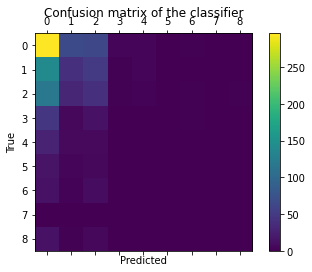

In [76]:
show_confusion_matrix(y_test, y_pred)

### Balancing the dataset

In [77]:
oversample = SMOTE()
X_train_smoted, y_train_smoted = oversample.fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [78]:
dt_clf_fals_ov = DecisionTreeClassifier(random_state=12)
dt_clf_fals_ov.fit(X_train_smoted, y_train_smoted)
y_pred = dt_clf_fals_ov.predict(X_test)

In [83]:
show_metrics(y_test, y_pred)

Accuracy score: 0.355410447761194
F1 Macro-Score: 0.0987295425668513
F1 Weighted-Score: 0.2801662337775929


In [80]:
matrix = confusion_matrix(y_test, y_pred)
matrix.diagonal()/matrix.sum(axis=1)

array([0.75570776, 0.14767932, 0.06965174, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.04      ])

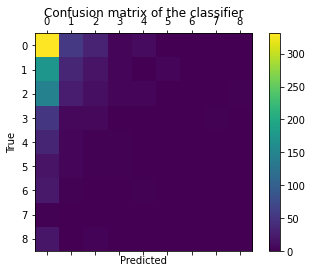

In [81]:
show_confusion_matrix(y_test, y_pred)